In [36]:
#Import MatplotLib 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
#Import other dependencies
import numpy as np
import pandas as pd
import datetime as dt 

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Climate Analysis and Exploration

In [39]:
#Create engine to Hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
#Reflection using automap
Base = automap_base()
Base.prepare(engine,reflect=True)

In [41]:
#Print classes mapped to Basee
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
#Create session from Python to the DB
session = Session(engine)

In [44]:
#View columns in Measurement class
first_row_m = session.query(Measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11e368d90>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'id': 1,
 'prcp': 0.08}

### Precipitation Analysis

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Understand how the date column works in class Measurement
for row in session.query(Measurement.date).all():
    print(row)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

('2015-06-17',)
('2015-06-18',)
('2015-06-19',)
('2015-06-20',)
('2015-06-21',)
('2015-06-22',)
('2015-06-23',)
('2015-06-24',)
('2015-06-25',)
('2015-06-26',)
('2015-06-27',)
('2015-06-28',)
('2015-06-29',)
('2015-06-30',)
('2015-07-01',)
('2015-07-02',)
('2015-07-03',)
('2015-07-04',)
('2015-07-05',)
('2015-07-06',)
('2015-07-07',)
('2015-07-08',)
('2015-07-09',)
('2015-07-10',)
('2015-07-11',)
('2015-07-12',)
('2015-07-13',)
('2015-07-14',)
('2015-07-15',)
('2015-07-16',)
('2015-07-17',)
('2015-07-18',)
('2015-07-19',)
('2015-07-20',)
('2015-07-21',)
('2015-07-22',)
('2015-07-23',)
('2015-07-24',)
('2015-07-25',)
('2015-07-26',)
('2015-07-27',)
('2015-07-28',)
('2015-07-29',)
('2015-07-30',)
('2015-07-31',)
('2015-08-01',)
('2015-08-02',)
('2015-08-03',)
('2015-08-04',)
('2015-08-05',)
('2015-08-06',)
('2015-08-07',)
('2015-08-08',)
('2015-08-09',)
('2015-08-10',)
('2015-08-11',)
('2015-08-12',)
('2015-08-13',)
('2015-08-14',)
('2015-08-15',)
('2015-08-16',)
('2015-08-17',)
('2015-0

('2011-12-27',)
('2011-12-28',)
('2011-12-29',)
('2011-12-30',)
('2011-12-31',)
('2012-01-01',)
('2012-01-02',)
('2012-01-03',)
('2012-01-04',)
('2012-01-05',)
('2012-01-06',)
('2012-01-07',)
('2012-01-08',)
('2012-01-09',)
('2012-01-10',)
('2012-01-11',)
('2012-01-12',)
('2012-01-13',)
('2012-01-14',)
('2012-01-15',)
('2012-01-16',)
('2012-01-17',)
('2012-01-19',)
('2012-01-20',)
('2012-01-21',)
('2012-01-22',)
('2012-01-23',)
('2012-01-24',)
('2012-01-25',)
('2012-01-26',)
('2012-01-27',)
('2012-01-28',)
('2012-01-29',)
('2012-01-30',)
('2012-01-31',)
('2012-02-01',)
('2012-02-02',)
('2012-02-03',)
('2012-02-04',)
('2012-02-05',)
('2012-02-06',)
('2012-02-07',)
('2012-02-08',)
('2012-02-09',)
('2012-02-10',)
('2012-02-11',)
('2012-02-12',)
('2012-02-13',)
('2012-02-14',)
('2012-02-15',)
('2012-02-16',)
('2012-02-17',)
('2012-02-18',)
('2012-02-19',)
('2012-02-20',)
('2012-02-21',)
('2012-02-22',)
('2012-02-23',)
('2012-02-24',)
('2012-02-25',)
('2012-02-26',)
('2012-02-27',)
('2012-0

('2016-03-15',)
('2016-03-16',)
('2016-03-17',)
('2016-03-18',)
('2016-03-19',)
('2016-03-20',)
('2016-03-21',)
('2016-03-22',)
('2016-03-23',)
('2016-03-24',)
('2016-03-25',)
('2016-03-26',)
('2016-03-27',)
('2016-03-28',)
('2016-03-29',)
('2016-03-30',)
('2016-03-31',)
('2016-04-01',)
('2016-04-02',)
('2016-04-03',)
('2016-04-04',)
('2016-04-05',)
('2016-04-06',)
('2016-04-07',)
('2016-04-08',)
('2016-04-09',)
('2016-04-10',)
('2016-04-11',)
('2016-04-12',)
('2016-04-13',)
('2016-04-14',)
('2016-04-15',)
('2016-04-16',)
('2016-04-17',)
('2016-04-18',)
('2016-04-19',)
('2016-04-20',)
('2016-04-21',)
('2016-04-22',)
('2016-04-23',)
('2016-04-24',)
('2016-04-25',)
('2016-04-26',)
('2016-04-27',)
('2016-04-28',)
('2016-04-29',)
('2016-04-30',)
('2016-05-01',)
('2016-05-02',)
('2016-05-03',)
('2016-05-04',)
('2016-05-05',)
('2016-05-06',)
('2016-05-07',)
('2016-05-08',)
('2016-05-09',)
('2016-05-10',)
('2016-05-11',)
('2016-05-12',)
('2016-05-13',)
('2016-05-14',)
('2016-05-15',)
('2016-0

('2014-07-04',)
('2014-07-05',)
('2014-07-06',)
('2014-07-07',)
('2014-07-08',)
('2014-07-09',)
('2014-07-10',)
('2014-07-11',)
('2014-07-12',)
('2014-07-13',)
('2014-07-14',)
('2014-07-15',)
('2014-07-16',)
('2014-07-17',)
('2014-07-18',)
('2014-07-19',)
('2014-07-20',)
('2014-07-21',)
('2014-07-22',)
('2014-07-23',)
('2014-07-24',)
('2014-07-25',)
('2014-07-27',)
('2014-07-28',)
('2014-07-29',)
('2014-07-30',)
('2014-07-31',)
('2014-08-01',)
('2014-08-02',)
('2014-08-04',)
('2014-08-05',)
('2014-08-06',)
('2014-08-07',)
('2014-08-08',)
('2014-08-09',)
('2014-08-11',)
('2014-08-12',)
('2014-08-13',)
('2014-08-14',)
('2014-08-15',)
('2014-08-17',)
('2014-08-18',)
('2014-08-19',)
('2014-08-20',)
('2014-08-21',)
('2014-08-22',)
('2014-08-24',)
('2014-08-25',)
('2014-08-26',)
('2014-08-27',)
('2014-08-28',)
('2014-08-29',)
('2014-08-30',)
('2014-09-01',)
('2014-09-02',)
('2014-09-03',)
('2014-09-04',)
('2014-09-05',)
('2014-09-07',)
('2014-09-08',)
('2014-09-09',)
('2014-09-10',)
('2014-0

('2011-09-20',)
('2011-09-26',)
('2011-09-27',)
('2011-09-28',)
('2011-09-29',)
('2011-09-30',)
('2011-10-03',)
('2011-10-04',)
('2011-10-05',)
('2011-10-06',)
('2011-10-07',)
('2011-10-10',)
('2011-10-11',)
('2011-10-12',)
('2011-10-13',)
('2011-10-14',)
('2011-10-17',)
('2011-10-18',)
('2011-10-19',)
('2011-10-20',)
('2011-10-21',)
('2011-10-24',)
('2011-10-25',)
('2011-10-26',)
('2011-10-27',)
('2011-10-28',)
('2011-11-03',)
('2011-11-04',)
('2011-11-07',)
('2011-11-08',)
('2011-11-09',)
('2011-11-10',)
('2011-11-14',)
('2011-11-15',)
('2011-11-16',)
('2011-11-17',)
('2011-11-18',)
('2011-11-21',)
('2011-11-22',)
('2011-11-23',)
('2011-11-28',)
('2011-11-29',)
('2011-11-30',)
('2011-12-01',)
('2011-12-02',)
('2011-12-05',)
('2011-12-06',)
('2011-12-07',)
('2011-12-08',)
('2011-12-09',)
('2011-12-12',)
('2011-12-13',)
('2011-12-14',)
('2011-12-15',)
('2011-12-16',)
('2012-01-04',)
('2012-01-05',)
('2012-01-06',)
('2012-01-09',)
('2012-01-10',)
('2012-01-11',)
('2012-01-12',)
('2012-0

('2012-10-22',)
('2012-11-01',)
('2012-11-08',)
('2012-11-13',)
('2012-11-15',)
('2012-11-16',)
('2012-11-20',)
('2012-11-26',)
('2012-11-27',)
('2012-12-03',)
('2012-12-06',)
('2013-01-10',)
('2013-01-14',)
('2013-01-23',)
('2013-01-24',)
('2013-01-25',)
('2013-02-01',)
('2013-02-02',)
('2013-02-06',)
('2013-02-07',)
('2013-02-08',)
('2013-02-14',)
('2013-02-15',)
('2013-02-20',)
('2013-02-22',)
('2013-02-25',)
('2013-02-27',)
('2013-04-03',)
('2013-04-05',)
('2013-04-08',)
('2013-04-11',)
('2013-04-15',)
('2013-08-05',)
('2013-08-06',)
('2013-08-07',)
('2013-08-08',)
('2013-08-09',)
('2013-08-12',)
('2013-08-14',)
('2013-08-19',)
('2013-08-21',)
('2013-08-22',)
('2013-08-23',)
('2013-08-27',)
('2013-08-29',)
('2013-08-30',)
('2013-09-01',)
('2013-09-05',)
('2013-09-06',)
('2013-09-10',)
('2013-09-16',)
('2013-09-19',)
('2013-09-30',)
('2013-10-18',)
('2013-12-17',)
('2013-12-19',)
('2013-12-20',)
('2013-12-23',)
('2014-01-06',)
('2014-01-08',)
('2014-01-10',)
('2014-01-13',)
('2014-0

('2015-05-23',)
('2015-05-24',)
('2015-05-25',)
('2015-05-26',)
('2015-05-27',)
('2015-05-28',)
('2015-05-29',)
('2015-05-30',)
('2015-05-31',)
('2015-06-01',)
('2015-06-02',)
('2015-06-03',)
('2015-06-04',)
('2015-06-05',)
('2015-06-06',)
('2015-06-07',)
('2015-06-08',)
('2015-06-09',)
('2015-06-10',)
('2015-06-11',)
('2015-06-12',)
('2015-06-13',)
('2015-06-14',)
('2015-06-15',)
('2015-06-16',)
('2015-06-17',)
('2015-06-18',)
('2015-06-19',)
('2015-06-20',)
('2015-06-21',)
('2015-06-22',)
('2015-06-23',)
('2015-06-24',)
('2015-06-25',)
('2015-06-26',)
('2015-06-27',)
('2015-06-29',)
('2015-06-30',)
('2015-07-01',)
('2015-07-02',)
('2015-07-06',)
('2015-07-07',)
('2015-07-08',)
('2015-07-09',)
('2015-07-10',)
('2015-07-11',)
('2015-07-12',)
('2015-07-13',)
('2015-07-14',)
('2015-07-15',)
('2015-07-16',)
('2015-07-17',)
('2015-07-18',)
('2015-07-19',)
('2015-07-20',)
('2015-07-21',)
('2015-07-23',)
('2015-07-24',)
('2015-07-25',)
('2015-07-26',)
('2015-07-27',)
('2015-07-28',)
('2015-0

('2012-01-16',)
('2012-01-17',)
('2012-01-18',)
('2012-01-19',)
('2012-01-20',)
('2012-01-21',)
('2012-01-22',)
('2012-01-23',)
('2012-01-24',)
('2012-01-25',)
('2012-01-26',)
('2012-01-27',)
('2012-01-28',)
('2012-01-29',)
('2012-01-30',)
('2012-01-31',)
('2012-02-01',)
('2012-02-02',)
('2012-02-03',)
('2012-02-04',)
('2012-02-05',)
('2012-02-06',)
('2012-02-07',)
('2012-02-08',)
('2012-02-09',)
('2012-02-10',)
('2012-02-11',)
('2012-02-12',)
('2012-02-13',)
('2012-02-14',)
('2012-02-15',)
('2012-02-16',)
('2012-02-17',)
('2012-02-18',)
('2012-02-19',)
('2012-02-20',)
('2012-02-21',)
('2012-02-22',)
('2012-02-23',)
('2012-02-24',)
('2012-02-25',)
('2012-02-26',)
('2012-02-27',)
('2012-02-28',)
('2012-02-29',)
('2012-03-01',)
('2012-03-02',)
('2012-03-03',)
('2012-03-04',)
('2012-03-05',)
('2012-03-06',)
('2012-03-07',)
('2012-03-08',)
('2012-03-09',)
('2012-03-10',)
('2012-03-11',)
('2012-03-12',)
('2012-03-13',)
('2012-03-14',)
('2012-03-15',)
('2012-03-16',)
('2012-03-17',)
('2012-0

('2016-02-24',)
('2016-02-25',)
('2016-02-26',)
('2016-02-27',)
('2016-02-28',)
('2016-02-29',)
('2016-03-01',)
('2016-03-02',)
('2016-03-03',)
('2016-03-04',)
('2016-03-05',)
('2016-03-06',)
('2016-03-07',)
('2016-03-08',)
('2016-03-09',)
('2016-03-10',)
('2016-03-11',)
('2016-03-12',)
('2016-03-13',)
('2016-03-14',)
('2016-03-15',)
('2016-03-16',)
('2016-03-17',)
('2016-03-18',)
('2016-03-19',)
('2016-03-20',)
('2016-03-21',)
('2016-03-22',)
('2016-03-23',)
('2016-03-24',)
('2016-03-25',)
('2016-03-26',)
('2016-03-27',)
('2016-03-28',)
('2016-03-29',)
('2016-03-30',)
('2016-03-31',)
('2016-04-01',)
('2016-04-02',)
('2016-04-03',)
('2016-04-04',)
('2016-04-05',)
('2016-04-06',)
('2016-04-07',)
('2016-04-08',)
('2016-04-09',)
('2016-04-10',)
('2016-04-11',)
('2016-04-12',)
('2016-04-13',)
('2016-04-14',)
('2016-04-15',)
('2016-04-16',)
('2016-04-17',)
('2016-04-18',)
('2016-04-19',)
('2016-04-20',)
('2016-04-21',)
('2016-04-22',)
('2016-04-23',)
('2016-04-24',)
('2016-04-25',)
('2016-0

('2012-09-15',)
('2012-09-16',)
('2012-09-17',)
('2012-09-18',)
('2012-09-19',)
('2012-09-20',)
('2012-09-21',)
('2012-09-22',)
('2012-09-23',)
('2012-09-24',)
('2012-09-25',)
('2012-09-26',)
('2012-09-27',)
('2012-09-28',)
('2012-09-29',)
('2012-09-30',)
('2012-10-01',)
('2012-10-02',)
('2012-10-03',)
('2012-10-04',)
('2012-10-05',)
('2012-10-06',)
('2012-10-07',)
('2012-10-08',)
('2012-10-09',)
('2012-10-10',)
('2012-10-11',)
('2012-10-12',)
('2012-10-13',)
('2012-10-14',)
('2012-10-15',)
('2012-10-16',)
('2012-10-17',)
('2012-10-18',)
('2012-10-19',)
('2012-10-20',)
('2012-10-21',)
('2012-10-22',)
('2012-10-23',)
('2012-10-24',)
('2012-10-25',)
('2012-10-26',)
('2012-10-27',)
('2012-10-28',)
('2012-10-29',)
('2012-10-30',)
('2012-10-31',)
('2012-11-01',)
('2012-11-02',)
('2012-11-03',)
('2012-11-04',)
('2012-11-05',)
('2012-11-06',)
('2012-11-07',)
('2012-11-08',)
('2012-11-09',)
('2012-11-10',)
('2012-11-11',)
('2012-11-12',)
('2012-11-13',)
('2012-11-14',)
('2012-11-15',)
('2012-1

('2012-09-20',)
('2012-09-21',)
('2012-09-22',)
('2012-09-23',)
('2012-09-24',)
('2012-09-25',)
('2012-09-26',)
('2012-09-27',)
('2012-09-28',)
('2012-10-03',)
('2012-10-08',)
('2012-10-09',)
('2012-10-10',)
('2012-10-11',)
('2012-10-12',)
('2012-10-19',)
('2012-10-22',)
('2012-10-23',)
('2012-10-24',)
('2012-10-25',)
('2012-10-26',)
('2012-10-27',)
('2012-10-28',)
('2012-10-29',)
('2012-10-30',)
('2012-10-31',)
('2012-11-01',)
('2012-11-02',)
('2012-11-03',)
('2012-11-04',)
('2012-11-05',)
('2012-11-06',)
('2012-11-07',)
('2012-11-08',)
('2012-11-09',)
('2012-11-10',)
('2012-11-11',)
('2012-11-12',)
('2012-11-13',)
('2012-11-14',)
('2012-11-15',)
('2012-11-16',)
('2012-11-17',)
('2012-11-19',)
('2012-11-20',)
('2012-11-21',)
('2012-11-22',)
('2012-11-23',)
('2012-11-24',)
('2012-11-25',)
('2012-11-26',)
('2012-11-27',)
('2012-11-28',)
('2012-11-29',)
('2012-11-30',)
('2012-12-01',)
('2012-12-02',)
('2012-12-03',)
('2012-12-04',)
('2012-12-05',)
('2012-12-06',)
('2012-12-07',)
('2012-1

('2017-04-14',)
('2017-04-15',)
('2017-04-16',)
('2017-04-17',)
('2017-04-18',)
('2017-04-19',)
('2017-04-20',)
('2017-04-21',)
('2017-04-22',)
('2017-04-23',)
('2017-04-24',)
('2017-04-25',)
('2017-04-26',)
('2017-04-27',)
('2017-04-28',)
('2017-04-29',)
('2017-04-30',)
('2017-05-01',)
('2017-05-02',)
('2017-05-04',)
('2017-05-05',)
('2017-05-06',)
('2017-05-07',)
('2017-05-08',)
('2017-05-09',)
('2017-05-10',)
('2017-05-11',)
('2017-05-12',)
('2017-05-13',)
('2017-05-14',)
('2017-05-15',)
('2017-05-16',)
('2017-05-17',)
('2017-05-18',)
('2017-05-20',)
('2017-05-21',)
('2017-05-22',)
('2017-05-23',)
('2017-05-24',)
('2017-05-25',)
('2017-05-26',)
('2017-05-27',)
('2017-05-28',)
('2017-05-30',)
('2017-06-01',)
('2017-06-03',)
('2017-06-04',)
('2017-06-05',)
('2017-06-06',)
('2017-06-07',)
('2017-06-08',)
('2017-06-10',)
('2017-06-11',)
('2017-06-12',)
('2017-06-13',)
('2017-06-14',)
('2017-06-15',)
('2017-06-16',)
('2017-06-17',)
('2017-06-18',)
('2017-06-19',)
('2017-06-20',)
('2017-0

In [46]:
#Retrieve the last 12 months of precipitation data and plot the results
#prcp_date = []
list_prcp=[]
list_date=[]
for row in session.query(Measurement.prcp, Measurement.date).filter(Measurement.date>="2016-08-23").all():
    #print(row)
    #prcp_date.append(row)
    #Unwrap the tuple and save each element in a different list
    (prcp,date) = row
    list_prcp.append(prcp)
    list_date.append(date)

In [52]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_date_df=pd.DataFrame({"Date":list_date,"Precipitation":list_prcp})
#Set Date as index
precipitation_df=prcp_date_df.set_index("Date")
#Sort by date
precipitation_df=precipitation_df.sort_values(["Date"])
precipitation_df[precipitation_df["Precipitation"]>3]
#precipitation_df=precipitation_df.dropna(how="any")

,Precipitation
Date,
2016-09-14,6.70
2016-09-15,3.35
2016-10-04,3.46
2017-02-11,5.04
2017-04-29,6.25
2017-07-22,4.00


/Users/balleara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


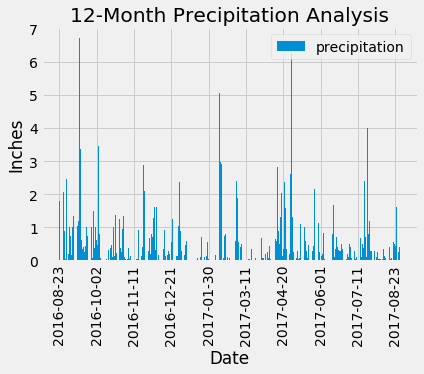

In [49]:
import matplotlib.axes as ax
import matplotlib.ticker as ticker

x_axis = prcp_date_df["Date"]
y_axis = prcp_date_df["Precipitation"]
#Define length of xaxis
#precipitation_df.plot(kind="bar")

plt.bar(x_axis, y_axis, label="precipitation")

xaxis= list(range(0,len(list_date)))
plt.xticks(rotation="vertical")
plt.title("12-Month Precipitation Analysis")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.legend(loc="best")

ax = plt.subplot()
ax.xaxis.set_major_locator(ticker.MultipleLocator(40))

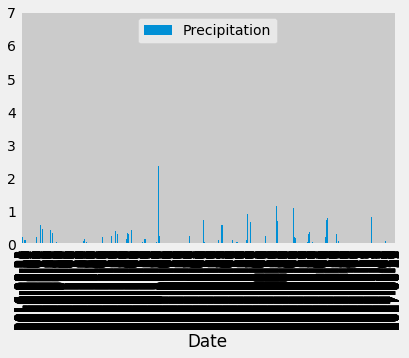

In [53]:
precipitation_df.plot(kind="bar")

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
precipitationdf.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [26]:
#View columns in Station class
first_row_s = session.query(Station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x116caa2d0>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [106]:
# Design a query to show how many stations are available in this dataset?
#Design a query to find the most active stations.
active_stations = session.query(Measurement.station).group_by(Measurement.station).count()
active_stations

9

In [139]:
#Design a query to find the most active stations.
#station_activity = session.query(Measurement.station).group_by(Measurement.station).all

active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).all()
active_stations


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [142]:
(x,y) = active_stations
#max(activity)

#tuple1, tuple2 = ('maths', 'che', 'phy', 'bio'), (456, 700, 200)
#print ("Max value element : ", max(tuple1))
#print ("Max value element : ", max(tuple2))

for row in session.query(Measurement.prcp, Measurement.date).filter(Measurement.date>="2016-08-23").all():
    #print(row)
    #prcp_date.append(row)
    #Unwrap the tuple and save each element in a different list
    (prcp,date) = row
    list_prcp.append(prcp)
    list_date.append(date)

ValueError: too many values to unpack (expected 2)

In [ ]:
#List the stations and observation counts in descending order.


# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [ ]:
#Which station has the highest number of observations?


#Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.
    
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [ ]:
 # Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Design a query to retrieve the last 12 months of temperature observation data (TOBS).


#Filter by the station with the highest number of observations.


#Plot the results as a histogram with bins=12.